Original prototype of PyTorch Plant Health classification model
Trains on fully representative training dataset with resized and normalized images

In [1]:
!git clone https://github.com/digitalepidemiologylab/plantvillage_deeplearning_paper_dataset.git

Cloning into 'plantvillage_deeplearning_paper_dataset'...
remote: Enumerating objects: 163224, done.
remote: Total 163224 (delta 0), reused 0 (delta 0), pack-reused 163224
Receiving objects: 100% (163224/163224), 2.00 GiB | 25.56 MiB/s, done.
Resolving deltas: 100% (97/97), done.
Checking out files: 100% (182401/182401), done.


In [2]:
import torch
import random
torch.manual_seed(0)
random.seed(0)

In [3]:
import os
from PIL import Image
import torchvision
import torchvision.transforms as transforms
from PIL import Image
from PIL import Image
from tensorflow import io
from tensorflow import image
from matplotlib import pyplot as plt


directory = '/content/plantvillage_deeplearning_paper_dataset/raw/color'
healthy_dir = []
unhealthy_dir = []
for filename in os.listdir(directory):
    f = os.path.join(directory, filename)
    # checking if it is a file
    #if os.path.isfile(f):
    #if 'Apple' in str(f):
    if 'healthy' in str(f):
      healthy_dir.append(f)
    else:
        unhealthy_dir.append(f)
print(healthy_dir)
print(unhealthy_dir)
transform = transforms.Compose([transforms.ToTensor(), transforms.Resize((64))])
healthy = []
unhealthy = []
for dir in healthy_dir:
  for filename in os.listdir(dir):
    f = os.path.join(dir, filename)
    healthy.append(torch.Tensor.float(transform(Image.open(f)))[:3])
for dir in unhealthy_dir:
  for filename in os.listdir(dir):
    f = os.path.join(dir, filename)
    unhealthy.append(torch.Tensor.float(transform(Image.open(f)))[:3])
print(len(healthy))
print(healthy[0].shape)
print(len(unhealthy))
print(unhealthy[0].shape)
# dataset = healthy + unhealthy
# labels = [1 for i in range(len(healthy))] + [0 for i in range(len(unhealthy))]

['/content/plantvillage_deeplearning_paper_dataset/raw/color/Soybean___healthy', '/content/plantvillage_deeplearning_paper_dataset/raw/color/Blueberry___healthy', '/content/plantvillage_deeplearning_paper_dataset/raw/color/Pepper,_bell___healthy', '/content/plantvillage_deeplearning_paper_dataset/raw/color/Grape___healthy', '/content/plantvillage_deeplearning_paper_dataset/raw/color/Raspberry___healthy', '/content/plantvillage_deeplearning_paper_dataset/raw/color/Tomato___healthy', '/content/plantvillage_deeplearning_paper_dataset/raw/color/Strawberry___healthy', '/content/plantvillage_deeplearning_paper_dataset/raw/color/Apple___healthy', '/content/plantvillage_deeplearning_paper_dataset/raw/color/Cherry_(including_sour)___healthy', '/content/plantvillage_deeplearning_paper_dataset/raw/color/Corn_(maize)___healthy', '/content/plantvillage_deeplearning_paper_dataset/raw/color/Peach___healthy', '/content/plantvillage_deeplearning_paper_dataset/raw/color/Potato___healthy']
['/content/pla

In [4]:
from torch.utils.data import Dataset
class CustomImageDataset(Dataset):
    def __init__(self, labels, images, transform=None, target_transform=None):
        self.img_labels = labels
        self.imgs = images
        self.transform = transform
        self.target_transform = target_transform

    def __len__(self):
        return len(self.img_labels)

    def __getitem__(self, idx):
        image = self.imgs[idx]
        label = self.img_labels[idx]
        # if self.transform:
        #     image = self.transform(image)
        # if self.target_transform:
        #     label = self.target_transform(label)
        return image, label

In [5]:
import random
def split(dataset, r = 0.8):
  k = int(r*len(dataset))
  train_idx = random.sample(list(range(len(dataset))), k = k)
  test_idx = [i for i in range(len(dataset)) if i not in train_idx]
  train_data = [dataset[i] for i in train_idx]
  test_data = [dataset[i] for i in test_idx]
  return train_data, test_data


In [6]:
h_train, h_test = split(healthy)
u_train, u_test = split(unhealthy)
train = h_train + u_train
tr_labels = [1 for i in range(len(h_train))] + [0 for i in range(len(u_train))]
test = h_test + u_test
t_labels = [1 for i in range(len(h_test))] + [0 for i in range(len(u_test))]
print(len(train), len(test))
transform = transforms.Compose([
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])
train_set = CustomImageDataset(tr_labels, train, transform = transform)
test_set = CustomImageDataset(t_labels, test, transform = transform)

43443 10862


In [9]:
import numpy as np
def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()

tensor([[[0.5824, 0.5873, 0.6059,  ..., 0.6814, 0.7000, 0.7069],
         [0.5990, 0.5824, 0.5892,  ..., 0.6912, 0.6657, 0.7196],
         [0.5961, 0.5922, 0.5814,  ..., 0.6951, 0.7059, 0.6990],
         ...,
         [0.5775, 0.5588, 0.5578,  ..., 0.5559, 0.3627, 0.1882],
         [0.5922, 0.5686, 0.5667,  ..., 0.5490, 0.4275, 0.2196],
         [0.5745, 0.5735, 0.5784,  ..., 0.5608, 0.4539, 0.2510]],

        [[0.5627, 0.5676, 0.5863,  ..., 0.6735, 0.6922, 0.6990],
         [0.5794, 0.5627, 0.5696,  ..., 0.6833, 0.6578, 0.7118],
         [0.5765, 0.5725, 0.5618,  ..., 0.6873, 0.6980, 0.6912],
         ...,
         [0.5304, 0.5118, 0.5108,  ..., 0.5010, 0.3078, 0.1333],
         [0.5451, 0.5216, 0.5196,  ..., 0.4941, 0.3725, 0.1647],
         [0.5275, 0.5265, 0.5314,  ..., 0.5059, 0.3990, 0.1961]],

        [[0.5784, 0.5833, 0.6020,  ..., 0.6853, 0.7039, 0.7108],
         [0.5951, 0.5784, 0.5853,  ..., 0.6951, 0.6696, 0.7235],
         [0.5922, 0.5882, 0.5775,  ..., 0.6990, 0.7098, 0.

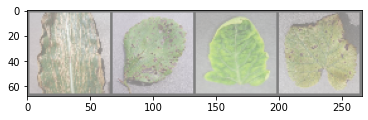

In [10]:
batch_size = 4
trainloader = torch.utils.data.DataLoader(train_set, batch_size=batch_size,
                                         shuffle=True, num_workers=2)
testloader = torch.utils.data.DataLoader(test_set, batch_size=batch_size,
                                         shuffle=True, num_workers=2)
dataiter = iter(trainloader)
images, labels = dataiter.next()
print(images[0])
imshow(torchvision.utils.make_grid(images))

In [11]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 13 * 13, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 2)

    def forward(self, x):
        #print(x.shape)
        x = self.pool(F.relu(self.conv1(x)))
        #print(x.shape)
        x = self.pool(F.relu(self.conv2(x)))
        #print(x.shape)
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        #print(x.shape)
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x


net = Net()

In [12]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)

In [13]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 0.528
[1,  4000] loss: 0.416
[1,  6000] loss: 0.377
[1,  8000] loss: 0.340
[1, 10000] loss: 0.305
[2,  2000] loss: 0.249
[2,  4000] loss: 0.218
[2,  6000] loss: 0.186
[2,  8000] loss: 0.197
[2, 10000] loss: 0.167
Finished Training


In [14]:
PATH = 'base_color.pth'
torch.save(net.state_dict(), PATH)

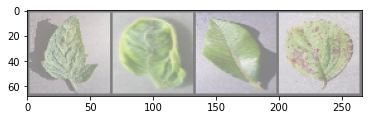

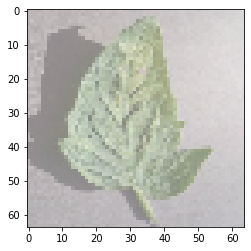

tensor([[[0.4725, 0.4618, 0.4716,  ..., 0.6833, 0.6843, 0.7265],
         [0.4794, 0.4892, 0.4784,  ..., 0.6912, 0.7020, 0.6961],
         [0.4549, 0.4765, 0.4971,  ..., 0.6863, 0.6961, 0.7059],
         ...,
         [0.3990, 0.4216, 0.4520,  ..., 0.5275, 0.5392, 0.5637],
         [0.4618, 0.4186, 0.3843,  ..., 0.5451, 0.5461, 0.5108],
         [0.4108, 0.4265, 0.4225,  ..., 0.5167, 0.5059, 0.5049]],

        [[0.4255, 0.4147, 0.4245,  ..., 0.6598, 0.6608, 0.7029],
         [0.4324, 0.4422, 0.4314,  ..., 0.6676, 0.6784, 0.6725],
         [0.4078, 0.4294, 0.4500,  ..., 0.6627, 0.6725, 0.6824],
         ...,
         [0.3716, 0.3941, 0.4245,  ..., 0.5039, 0.5157, 0.5402],
         [0.4343, 0.3912, 0.3569,  ..., 0.5216, 0.5225, 0.4873],
         [0.3833, 0.3990, 0.3951,  ..., 0.4931, 0.4824, 0.4814]],

        [[0.4333, 0.4225, 0.4324,  ..., 0.6598, 0.6608, 0.7029],
         [0.4402, 0.4500, 0.4392,  ..., 0.6676, 0.6784, 0.6725],
         [0.4157, 0.4373, 0.4578,  ..., 0.6627, 0.6725, 0.

In [15]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
imshow(images[0])
print(images[0])

In [16]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [17]:
outputs = net(images)

In [18]:
print(labels)

tensor([0, 0, 1, 0])


In [19]:
_, predicted = torch.max(outputs, 1)
print(predicted)

tensor([0, 0, 0, 0])


In [20]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in trainloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

In [21]:
print(f'Train Accuracy of the network: {100 * correct // total} %')

Train Accuracy of the network: 93 %


In [22]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()


In [23]:
print(f'Test Accuracy of the network: {100 * correct // total} %')

Test Accuracy of the network: 92 %
